In [1]:
from glob import glob
import datetime

import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
from scipy.stats import spearmanr

# HR v Age - with Redshift cuts

Since we can't figure out what is happening, does it change with redshift?

In [2]:
dataset = 'campbell'   # 'gupta' or 'campbell' or 'campbellG'
z_max = 0.2   # campbell is already cut at  ~0.33

## Import HR

In [3]:
if dataset in ['campbell', 'campbellG']:
    # Campbell objects
    # Campbell uncorrected distances
    SNData = pd.read_csv('../data/CampbellHoltzman_mb.tsv', sep='\t', usecols=['SNID', 'redshift', 'hr', 'err_mu'], index_col='SNID')
    SNData.rename(columns={'err_mu': 'hr uncert'}, inplace=True)
if dataset == 'gupta':
    # Gupta objects
    # Guptas cosmology
    SNData = pd.read_csv('../data/Gupta11_table2.tsv', sep='\t', skiprows=2, usecols=['x_1 uncert', 'HR'])#, index_col='SN ID')
    SNData.rename(columns={'x_1 uncert': 'hr', 'HR': 'hr uncert' }, inplace=True) # 'cause read_csv is shifting the headers over by one?
print(len(SNData))
SNData.head(5)

306


,redshift,hr uncert,hr
SNID,,,
10028,0.065392,0.090201,-0.210239
1032,0.129755,0.124407,-0.154126
10324,0.251725,0.151389,-0.311558
10550,0.300813,0.223295,0.217537
10559,0.281092,0.177469,0.064661


## Cut on Redshift

In [4]:
SNData = SNData[SNData['redshift']<z_max]
len(SNData)

110

In [17]:
a = SNData[SNData['hr']<0.6]
a = a[a['hr']>-0.6]
len(a)

104

## Import Ages

In [5]:
# number of samples desired
num = 50

In [6]:
# test= pd.concat([SNData, ages], axis=1)  ## ages dataframe is going away
test = SNData.copy()
test.dropna(inplace=True)  # drop rows that don't hae both HR & ages
for i in range(num):
    test['random age {}'.format(i)] = np.nan
# test.head(5)
test

,redshift,hr uncert,hr,random age 0,random age 1,random age 2,random age 3,random age 4,random age 5,random age 6,...,random age 40,random age 41,random age 42,random age 43,random age 44,random age 45,random age 46,random age 47,random age 48,random age 49
SNID,,,,,,,,,,,,,,,,,,,,,
10028,0.065392,0.090201,-0.210239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032,0.129755,0.124407,-0.154126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10805,0.045248,0.103240,-0.122898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11172,0.136329,0.103244,0.242901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12860,0.121679,0.065693,0.011927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12898,0.083581,0.061660,0.034847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12950,0.082734,0.059235,0.090832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13135,0.104671,0.070076,-0.083130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13354,0.157625,0.084229,-0.043040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**NOTICE:**

**THIS WILL TAKES A VERY LONG TIME**


In [7]:
if dataset == 'gupta':
    files = '../resources/SN{}_gupta_chain.tsv'
if dataset == 'campbell':
    files = '../resources/SN{}_campbell_chain.tsv'
if dataset == 'campbellG':
    files = '../resources/SN{}_campbellG_chain.tsv'

# for i in SNData.index.values:
for i in test.index.values:
    # So this works with only a partical dataset
    try:
        ages_ = pd.read_csv(files.format(i), sep='\t', skiprows=[1],
                            usecols=['age'], dtype={'age': np.float64})
        # Get 10 random values of ages_
        # Use randint because it is half open: [low, high)
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html
        # Unlike random_integer
        index=np.random.randint(len(ages_), size=num)
        # add the randomly collected ages to the dataframe.
        # `.loc` allows access to the `num` random age "cells"
        # `.values` takes the ages_ from a series to a array
        # `.reshape` takes the (`num`,1) column array and makes it a horizontal array
        test.loc[i, 'random age 0':'random age {}'.format(num-1)] = ages_.values[index].reshape(num)
    except FileNotFoundError:
        # if data file is not there do nothing
        print(f'Skipping SN{i} becuase {files.format(i)} is not present')

# remove rows where no age was added
# should be a result of hitting the except block.
test.dropna(inplace=True)        

test.head(5)

,redshift,hr uncert,hr,random age 0,random age 1,random age 2,random age 3,random age 4,random age 5,random age 6,...,random age 40,random age 41,random age 42,random age 43,random age 44,random age 45,random age 46,random age 47,random age 48,random age 49
SNID,,,,,,,,,,,,,,,,,,,,,
10028,0.065392,0.090201,-0.210239,5.193292,6.185691,6.103265,6.431162,5.943349,6.940967,5.997500,...,5.355313,6.346711,7.644120,7.193608,6.896810,6.108225,7.134767,6.618726,6.220244,6.998108
1032,0.129755,0.124407,-0.154126,0.317129,6.656874,7.463181,6.185140,7.128861,1.057752,8.999698,...,9.855961,7.205864,7.335829,5.386331,9.186264,6.252195,5.985144,6.661782,6.535240,8.202561
10805,0.045248,0.103240,-0.122898,7.651389,3.424535,6.099482,2.568446,6.388012,4.029717,2.275342,...,2.662055,4.754689,1.534072,4.152214,4.368663,4.007449,6.773435,5.213720,3.315867,6.335599
11172,0.136329,0.103244,0.242901,5.913394,5.374238,4.631073,7.331823,4.291470,5.586925,3.878556,...,5.249376,5.353899,5.166364,5.596715,5.327779,5.518167,4.938277,5.011684,5.001212,4.863783
12860,0.121679,0.065693,0.011927,5.111666,6.388842,7.368591,10.040782,2.173293,8.200934,6.788454,...,5.429478,5.596458,6.600111,6.491034,7.364608,4.549761,1.562095,1.647410,9.722724,3.306064


In [8]:
# make sure you add the dtype, or else the regression plots do not work
plot = pd.DataFrame(columns=['hr', 'age'], dtype=np.float64)
plot.loc[0] = 1

for index in range(len(test)):
    for num_ in range(num):
# test.loc[index+1, 'random age {}'.format(num_)]
        # add a small bit of noice on the HR to let the linear fitting work.
        # this remvoes the fact that so many have the SAME HR.
        plot.loc[index*num+num_, ['hr', 'age']] = [test.iloc[index]['hr']+(test.iloc[index]['hr uncert']/3)*np.random.randn(1)[0],
                                                   test.iloc[index]['random age {}'.format(num_)]]
#         print(plot[index*num_+num_, ['hr', 'age']])
#         plot.loc[index_*num_+num_, ['hr', 'age']] = test[index, 'random age {}'.format(num_)]

plot.head(5)

,hr,age
0,-0.215939,5.193292
1,-0.190051,6.185691
2,-0.155604,6.103265
3,-0.207961,6.431162
4,-0.194774,5.943349


## Make plot

In [9]:
# Set plot configurations

## ylim changes
if dataset == 'gupta':
    ylim = (-0.5, 0.5)
else:
    ylim = (-0.75, 0.75)

## global v local labels
if dataset in ['gupta', 'campbellG']:
    xlabel = 'global age [Gyr]'
else:
    xlabel = 'local age [Gyr]'
    
    
## Savefig
uuid = 0   #need a place holder
if dataset == 'gupta':
    savename = f'GlobalHRvAge{uuid}.pdf'
elif dataset == 'campbellG':
    savename = f'campbellG-HRvAge{uuid}.pdf'
elif dataset == 'campbell':
    savename = f'LocalHRvAge{uuid}.pdf'
else:
    savename = f'HRvAge{uuid}.pdf'

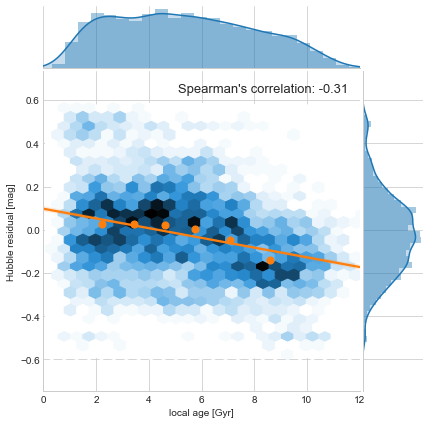

In [22]:
#'rug':True in marginal_kws, makes it very slow and looks like a solid line
g = sns.jointplot(plot[plot['hr']<0.6]['age'], plot[plot['hr']<0.6]['hr'], stat_func=spearmanr, kind="hex", gridsize=25,
# g = sns.jointplot(plot['age'], plot['hr'], stat_func=spearmanr, kind="hex", gridsize=25,
                  bins=None, space=0.05, xlim=(0,12),  #ylim=ylim, #ylim=(-0.75, 1.4),
                  marginal_kws={'kde':True, 'hist':True,
                                'kde_kws':{"shade":True}}
                 )

# g = g.plot_joint(plt.scatter, alpha=0) #skip green color
g = g.plot_joint(sns.regplot, x_bins=6, x_ci=None)#,  # not really needed anymore
#                  ci=68)

# This is plotted on top of jointplot's forced marginals
# g = g.plot_marginals(sns.distplot, kde=True)  # currently the best option
# g = g.plot_marginals(sns.distplot, kde=True, hist=False, kde_kws={"shade" : True})
# g = g.plot_marginals(sns.kdeplot, shade=True, cumulative=True, hist=False)

g = g.annotate(spearmanr, stat="Spearman's correlation",
               loc="upper right", fontsize=13, 
               template="{stat}: {val:.2f}")
# it looks like <abs(0.3) for spearman r is not very correlated.

g = g.set_axis_labels(xlabel, 'Hubble residual [mag]')
# fig.set_tight_layout({'pad': 1.5})   #cut edge whitespace -- not needed for this figure.

uuid = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
# g.savefig(savename)
# g.savefig('HRvAge-campbell-global-corrected-z02.pdf')
plt.show()

# Other plots

Lets try

- Splitting the data in half (at 4 Gyr)
- Lets just try that for now

In [11]:
plot_old = plot[plot['age']>=4].copy()
plot_young = plot[plot['age']<4].copy()
print(len(plot), len(plot_old), len(plot_young))

5500 3566 1934


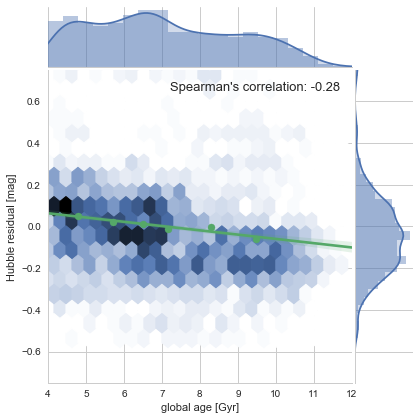

In [60]:
#'rug':True in marginal_kws, makes it very slow and looks like a solid line
g = sns.jointplot(plot_old['age'], plot_old['hr'], stat_func=spearmanr, kind="hex", gridsize=25,
                  bins=None, space=0.05, xlim=(4,12),  ylim=ylim, #ylim=(-0.75, 1.4),
                  marginal_kws={'kde':True, 'hist':True,
                                'kde_kws':{"shade":True}}
                 )

# g = g.plot_joint(plt.scatter, alpha=0) #skip green color
g = g.plot_joint(sns.regplot, x_bins=6, x_ci=None)#,  # not really needed anymore
#                  ci=68)

# This is plotted on top of jointplot's forced marginals
# g = g.plot_marginals(sns.distplot, kde=True)  # currently the best option
# g = g.plot_marginals(sns.distplot, kde=True, hist=False, kde_kws={"shade" : True})
# g = g.plot_marginals(sns.kdeplot, shade=True, cumulative=True, hist=False)

g = g.annotate(spearmanr, stat="Spearman's correlation",
               loc="upper right", fontsize=13, 
               template="{stat}: {val:.2f}")
# it looks like <abs(0.3) for spearman r is not very correlated.

g = g.set_axis_labels(xlabel, 'Hubble residual [mag]')
# fig.set_tight_layout({'pad': 1.5})   #cut edge whitespace -- not needed for this figure.

uuid = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
# g.savefig(savename)
# g.savefig('HRvAge-campbell-global-corrected-z02old.pdf')
plt.show()

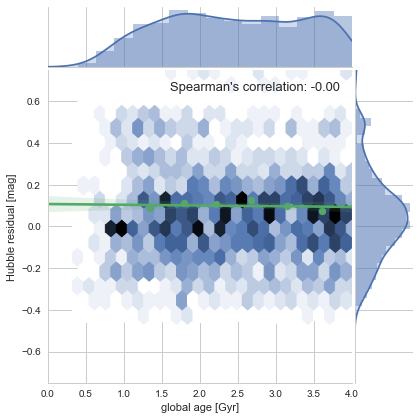

In [58]:
#'rug':True in marginal_kws, makes it very slow and looks like a solid line
g = sns.jointplot(plot_young['age'], plot_young['hr'], stat_func=spearmanr, kind="hex", gridsize=25,
                  bins=None, space=0.05, xlim=(0,4),  ylim=ylim, #ylim=(-0.75, 1.4),
                  marginal_kws={'kde':True, 'hist':True,
                                'kde_kws':{"shade":True}}
                 )

# g = g.plot_joint(plt.scatter, alpha=0) #skip green color
g = g.plot_joint(sns.regplot, x_bins=6, x_ci=None)#,  # not really needed anymore
#                  ci=68)

# This is plotted on top of jointplot's forced marginals
# g = g.plot_marginals(sns.distplot, kde=True)  # currently the best option
# g = g.plot_marginals(sns.distplot, kde=True, hist=False, kde_kws={"shade" : True})
# g = g.plot_marginals(sns.kdeplot, shade=True, cumulative=True, hist=False)

g = g.annotate(spearmanr, stat="Spearman's correlation",
               loc="upper right", fontsize=13, 
               template="{stat}: {val:.2f}")
# it looks like <abs(0.3) for spearman r is not very correlated.

g = g.set_axis_labels(xlabel, 'Hubble residual [mag]')
# fig.set_tight_layout({'pad': 1.5})   #cut edge whitespace -- not needed for this figure.

uuid = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
# g.savefig(savename)
# g.savefig('HRvAge-campbell-global-corrected-z02young.pdf')
plt.show()

### Lets combine these two figures into one plot

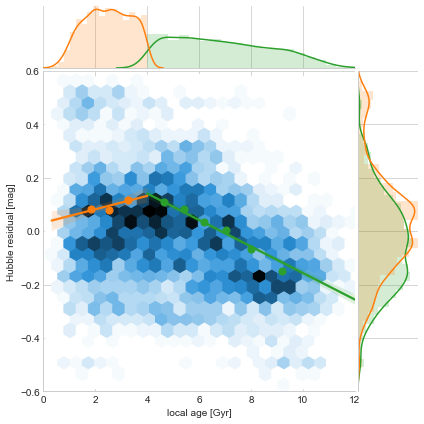

In [71]:
#'rug':True in marginal_kws, makes it very slow and looks like a solid line
g = sns.jointplot('age', 'hr', data=plot[plot['hr']<0.6], stat_func=spearmanr, kind="hex", gridsize=25,
                  bins=None, space=0.05, xlim=(0,12),  ylim=(-0.6, 0.6), #ylim=(-0.75, 1.4),
                  marginal_kws={'kde':False, 'hist':False,
                                'kde_kws':{"shade":True}}
                 )

# g.data= g.__init__(plot_young['age'], plot_young['hr'])
# g.data = plot_young
# g = g.plot_joint(sns.regplot, x_bins=6, x_ci=None)#,  # not really needed anymore
#                  ci=68)
# color info: https://matplotlib.org/api/colors_api.html
sns.regplot(plot_old['age'], plot_old['hr'], 
            x_bins=6, x_ci=None, color='tab:green',
            truncate=True, ax=g.ax_joint)
sns.regplot(plot_young['age'], plot_young['hr'],
            x_bins=3, x_ci=None, color='tab:orange',
            truncate=True, ax=g.ax_joint)

# _ = g.ax_marg_x.hist(plot_young['age'])# kde=True)#, hist=True,
# _ = g.ax_marg_x.hist(plot_old['age'])# kde=True)#, hist=True,

sns.distplot(plot_old[plot_old['hr']<0.6]['age'], color='tab:green',
             axlabel='', label='Age > 4 Gyr', 
             ax=g.ax_marg_x,
             hist_kws={"alpha": 0.2})
sns.distplot(plot_young[plot_young['hr']<0.6]['age'], color='tab:orange',
             axlabel='', label='Age < 4 Gyr', 
             ax=g.ax_marg_x,
             hist_kws={"alpha": 0.2})

# _ = g.ax_marg_y.hist(plot_young['hr'], orientation="horizontal", alpha=.5)# kde=True)#, hist=True,
# _ = g.ax_marg_y.kdeplot(plot_old['hr'], orientation="horizontal", alpha=.5)# kde=True)#, hist=True,
sns.distplot(plot_old[plot_old['hr']<0.6]['hr'], vertical=True, color='tab:green',
             axlabel='', label='Age > 4 Gyr', 
             ax=g.ax_marg_y,
             hist_kws={"alpha": 0.2})
sns.distplot(plot_young[plot_young['hr']<0.6]['hr'], vertical=True, color='tab:orange',
             axlabel='', label='Age < 4 Gyr', 
             ax=g.ax_marg_y,
             hist_kws={"alpha": 0.2})


# _ = g.ax_marg_x.kde(plot_young['age'])
# g = g.plot_marginals(sns.distplot, hist=True, kde_kws={"shade":True})

# _ = g.ax_marg_x.distplot(plot_young['age'])

# g = g.plot_joint(sns.regplot, x_bins=6, x_ci=None)#,  # not really needed anymore
#                  ci=68)

# g = g.plot_joint(plt.hexbin)#, x=plot_old['age'], y=plot_old['hr'])
#                  plot_old['age'], plot_old['hr'], stat_func=spearmanr, kind="hex", gridsize=25,
#                   bins=None, space=0.05, xlim=(0,12),  ylim=ylim, #ylim=(-0.75, 1.4),
#                   marginal_kws={'kde':True, 'hist':True,
#                                 'kde_kws':{"shade":True}}
#                  )

# This is plotted on top of jointplot's forced marginals
# g = g.plot_marginals(sns.distplot, kde=True)  # currently the best option
# g = g.plot_marginals(sns.distplot, kde=True, hist=False, kde_kws={"shade" : True})
# g = g.plot_marginals(sns.kdeplot, shade=True, cumulative=True, hist=False)

g = g.annotate(spearmanr, stat="Spearman's correlation",
               loc="upper right", fontsize=13, 
#                template="{stat}: {val:.2f}")
               template='')
# it looks like <abs(0.3) for spearman r is not very correlated.

g = g.set_axis_labels(xlabel, 'Hubble residual [mag]')
# fig.set_tight_layout({'pad': 1.5})   #cut edge whitespace -- not needed for this figure.

# g.savefig('HRvAge-campbell-local-corrected-z02splitDists.pdf')
plt.show()

In [39]:
b, g, r, p, t, _ = sns.color_palette('dark')

In [56]:
import matplotlib
matplotlib.__version__

'2.0.0'

In [58]:
b

(0.0, 0.10980392156862745, 0.4980392156862745)